##TRABAJO FINAL DMC - CNN CIFAR - 10
###Integrantes: 
* Rafael Lazo
* Gianella Arevalo
* Noelia Pantigoso

####Objectivo: se deberá desarrollar una Red Neuronal Convolucional (CNN) para predecir la categoria de una imagen

####Descripción de la data

El conjunto de datos CIFAR-10 consta de 60000 imágenes en color de 32x32 en 10 clases, con 6000 imágenes por clase. Hay 50000 imágenes de entrenamiento y 10000 imágenes de prueba.

El conjunto de datos se divide en cinco lotes de entrenamiento y un lote de prueba, cada uno con 10000 imágenes. 

El lote de prueba contiene exactamente 1000 imágenes seleccionadas al azar de cada clase. 

Los lotes de entrenamiento contienen las imágenes restantes en orden aleatorio. Contienen exactamente 5000 imágenes de cada clase.

avión automóvil pájaro gato ciervo perro rana caballo barco camión

170498071/170498071 [==============================] - 14s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


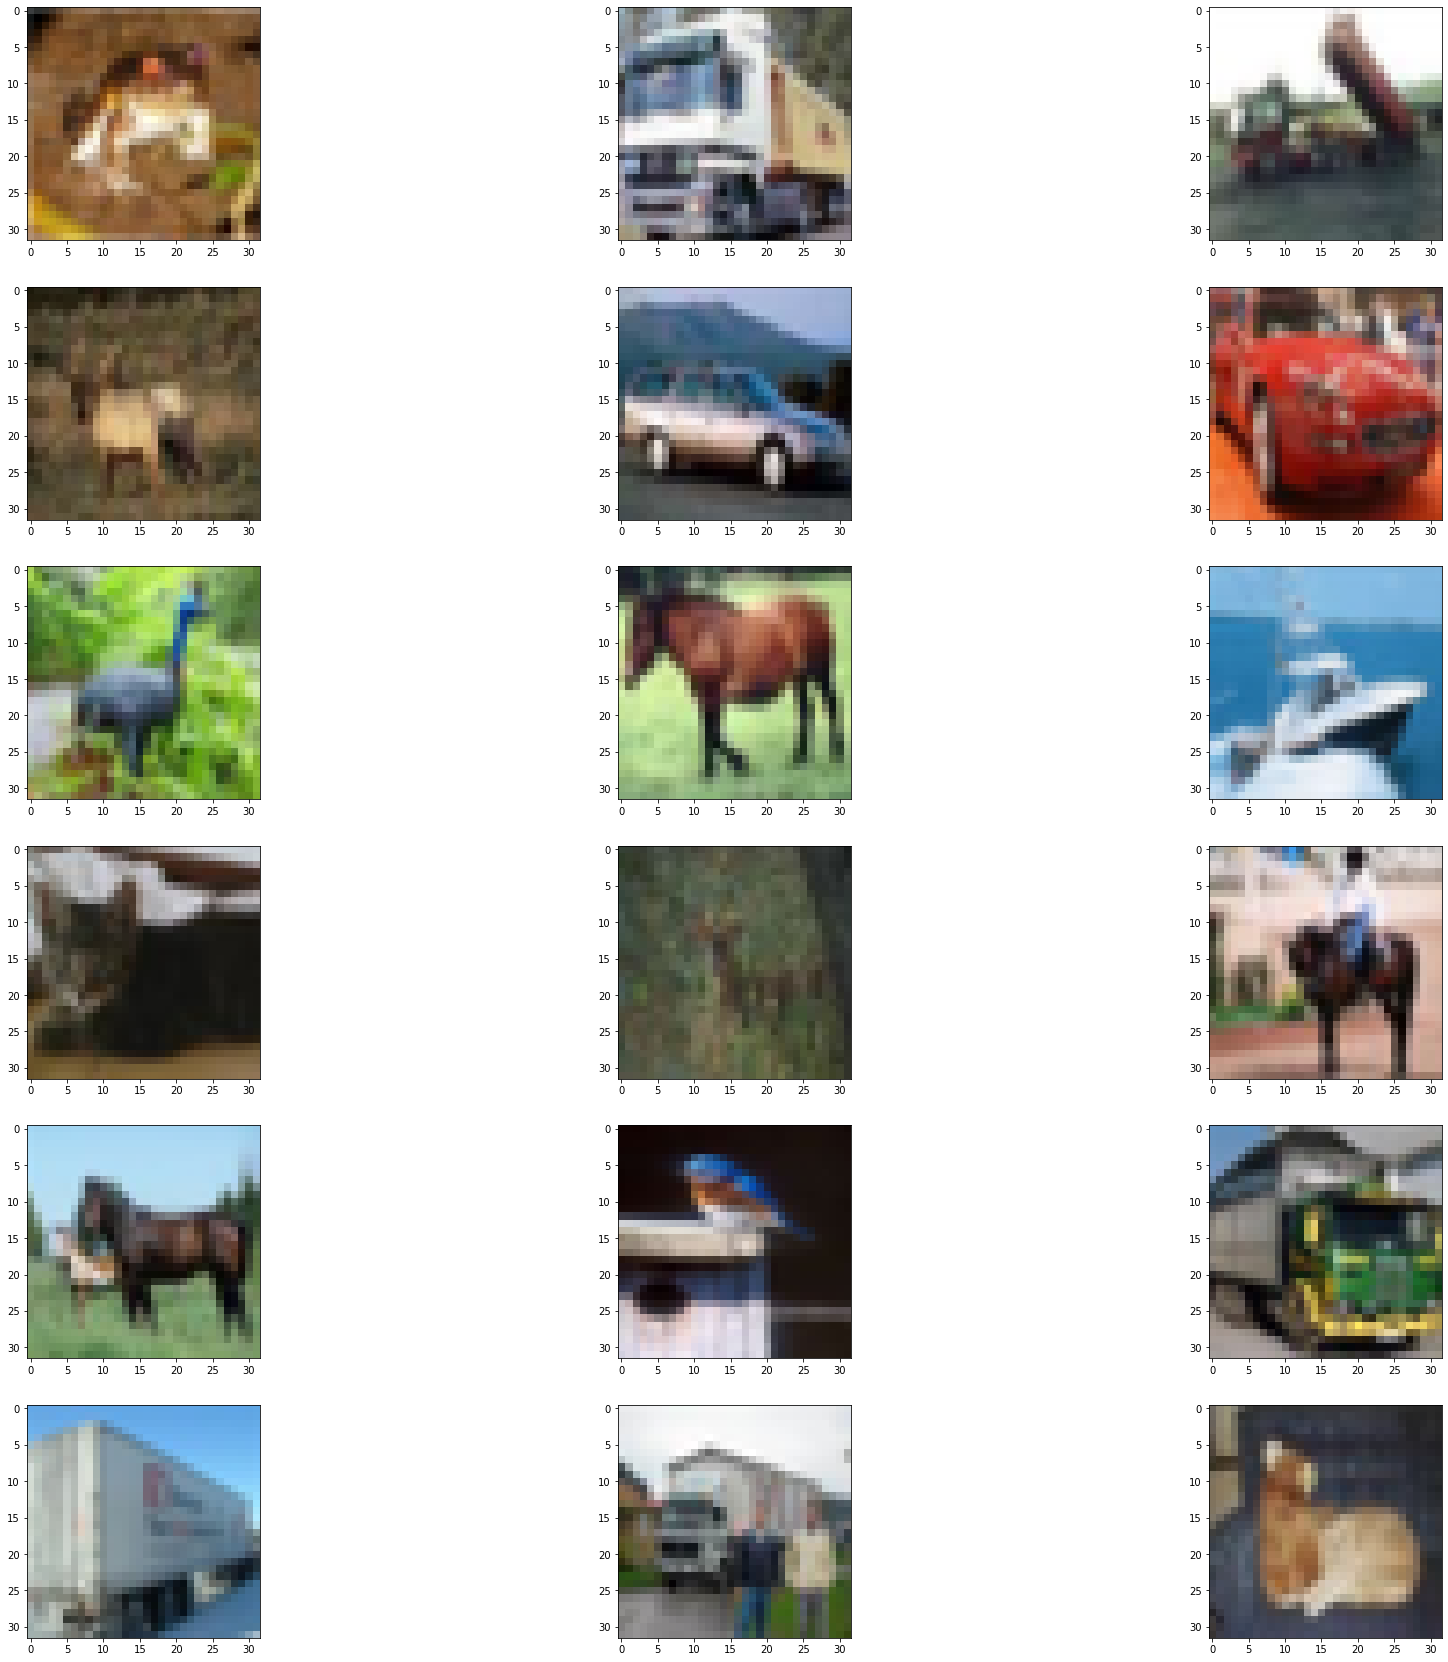

In [ ]:
from matplotlib import pyplot
from keras.datasets import cifar10


# CARGANDO DATA
(trainX, trainy), (testX, testy) = cifar10.load_data()
# TENEMOS 50 000 EJEMPLOS EN LA DATASET DE ENTRENAMIENTO Y 10 000 EN LA DATA SET DE ENTRENAMIENTO, LAS IMAGENES SON CUADRADAS, OSEA, 
# 32 X 32 PIXELES Y TIENEN 3 CANALES (R,G,B)
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
#PLOTEAMOS PRIMERAS 18 IMAGENES, COMO VEMOS LAS IMAGENES SON DE MUY BAJA RESOLUCION, LO CUAL DE ALGUNA MANERA DISMINUYE, EL RENDIMIENTO
#DE CLASIFICACIÓN DE NUESTRO CNN (Red Neuronal Convolucional)

#configurando tamaño de plot figura
pyplot.figure(figsize=(30, 30))
for i in range(18):
 # DEFINIMOS SUBPLOT
 pyplot.subplot(6 ,  3 , 1 + i)
 # PLOTEAMOS IMAGEN DE LA DATA SET DE ENTRENAMIENTO
 pyplot.imshow(trainX[i])
# MOSTRAMOS LAS IMAGENES 
# pyplot.figure(figsize=(1000, 1000))
pyplot.show()

#tambien sabemos que existen 10 clases en nuestro dataset y todas las imagenes tienen el mismo tamaño

In [ ]:
#En nuestro dataset y de entrenamiento tenemos que las categorias estan almacenados en formato númerico,
#en este caso usaremos el oneHotEncoding para tener solo zeros y unos en este vector
print(trainy)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [ ]:
from keras.utils import to_categorical

trainY = to_categorical(trainy)
testY = to_categorical(testy)

In [ ]:
#crearemos una funcion que nos de la carga de data
def load_dataset():
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [ ]:
#necesitamos también normalizar la data
#creamos la funcion para normalizar la data
def prep_pixels(train, test):
 #aquí convertimos los valores de lso pixeles de Integers a Float32
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')
 #como sabemos, los valroes rgb van del 0 al 255, entocnes , dividiendo entre 255 nos aseguramos que normalizamos los valores
 #entre 0 y 1
 train_norm = train_norm / 255.0
 test_norm = test_norm / 255.0
 #retornamos o devolvemos solo las imagenes con valores rgb normalizados
 return train_norm, test_norm

In [ ]:
# definimos el modelo cnn model
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout


In [ ]:

def define_model():
  #definimos el modelo
 model = Sequential()
 #para definir nuestro modelo, usaremos VGG (Very Deep Convolutional Networks), el cual es una arquitectura CNN y permite incrementar la profundidad de neustro CNN y por lo tanto 
 #aumenta el rendimiento del modelo
 #mas informacion aqui https://viso.ai/deep-learning/vgg-very-deep-convolutional-networks/
 #aqui una lista de las arquitecturas mas usadas https://towardsdatascience.com/top-10-cnn-architectures-every-machine-learning-engineer-should-know-68e2b0e07201
 
 #Conv2D determinará cuantos filtros se aplicarán, en este caso un bloque de 
#32, tmabién podemos añadir un segundo bloque y tercer
#más info aquí https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

#(3x3) La arquitectura implica el apilamiento de capas convolucionales con pequeños filtros de 3×3 seguidos de una capa de agrupación máxima.
#Padding se usa en las capas convolucionales para garantizar que la altura y el ancho de los mapas de características de salida coincidan con las entradas
#Activation='relu' : Cada capa utilizará la función de activación de ReLU y la inicialización de 'he_uniform', que generalmente son las mejores prácticas. Siempre
#que se usa ReLu se recomiena usar la inicialoización 'he_uniform'

#La función Reluactivation ayuda a las redes neuronales a formar modelos de 
#aprendizaje profundo. Debido a los problemas de gradiente de fuga en diferentes 
#capas, no se puede utilizar la tangente hiperbólica y la activación sigmoide. 
#Puede superar los problemas de gradiente mediante la función de activación Relu. 
#Esto permite que el modelo funcione mejor y aprenda más rápido. 
#Cuando desarrolle el Perceptrón convolucional y multicapa, 
#la función de activación lineal rectificada de las redes neuronales 
#será la opción por defecto.



# Dropout es una técnica simple que eliminará aleatoriamente los nodos de la red. Sirve para prevenir overfitting
# al marcar 0.25, estamos diciendo que retenga el 75% de los nodos, el resto serán dropeados
# mas info aqui: https://www.youtube.com/watch?v=ARq74QuavAo&ab_channel=DeepLearningAI

 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Dropout(0.25))

#segundo bloque
#  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#  model.add(MaxPooling2D((2, 2)))
#  model.add(Dropout(0.25))

#tercer bloque
#  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#  model.add(MaxPooling2D((2, 2)))
#  model.add(Dropout(0.25))


#parte del output del modelo:
#Primero, la salida de los mapas de características de la parte de extracción de características del modelo deben de aplanarse
#El método flatten() se utiliza para convertir una matriz multidimensional en una matriz plana o unidimensional.
 model.add(Flatten())
 
# Luego podemos interpretarlos con una o más capas completamente conectadas y luego generar una predicción.
# Añadimos una Capa Densa de 128 neuronas, la cual alimenta todas las salidas de la capa 
#anterior a todas sus neuronas, cada neurona proporciona una salida a la siguiente capa.
 model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dropout(0.25))
# La capa de salida debe tener 10 nodos para las 10 clases y usar la función de activación softmax.
 model.add(Dense(10, activation='softmax'))

 # Compilando el modelo
 #El modelo se optimizará mediante el stochastic gradient descent.().
 #learning rate de 0.001 y un momentum de 0.8 los cuales son recomendados, soporte en el siguiente enlace:
 #https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1
 opt = SGD(learning_rate=0.001, momentum=0.9)

 #El modelo optimizará la función de "categorical cross entropy" 
 #necesaria para la clasificación de clases (aqui tenemos 10 clases) y controlará la precisión de la clasificación.
 
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 return model

In [ ]:
import sys


In [ ]:
#Presentacion de resultados
def summarize_diagnostics(history):
  #Leyenda: color morado mostrará el rendimiento en la data de entrenamiento, 
  #y el color amarillo nos trará el resultado en la data detesteo
  
	# mostramos la perdida
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='purple', label='train')
	pyplot.plot(history.history['val_loss'], color='yellow', label='test')
	# mostramos el accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='purple', label='train')
	pyplot.plot(history.history['val_accuracy'], color='yellow', label='test')
	#guardamos el ploteo o la imagen
	filename = sys.argv[0].split('/')[-1]
	pyplot.show()
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

In [ ]:

def run_():
	# Cargar data
	trainX, trainY, testX, testY = load_dataset()
	#preparar y normalziar pixeles
	trainX, testX = prep_pixels(trainX, testX)
	#definir modelo
	model = define_model()
	# ajustamos el modelo despues de que ya lo definimos
  #establecesmo 100 epocas de entrenamiento y un batch size de 64 (numero de ejemplos) , verbose 2 para que nos muestre el proceso o epocas
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=2)
	#Evaluamos el modelo con los datos de Testeo
	_, acc = model.evaluate(testX, testY, verbose=0)
 
 #mostramos la Presición de  Clasificación (accuracy)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	return history , model


	

In [ ]:
history , model = run_()

Epoch 1/100
782/782 - 13s - loss: 1.8912 - accuracy: 0.3164 - val_loss: 1.5755 - val_accuracy: 0.4518 - 13s/epoch - 17ms/step
Epoch 2/100
782/782 - 4s - loss: 1.5623 - accuracy: 0.4357 - val_loss: 1.3883 - val_accuracy: 0.5128 - 4s/epoch - 5ms/step
Epoch 3/100
782/782 - 4s - loss: 1.4270 - accuracy: 0.4874 - val_loss: 1.3017 - val_accuracy: 0.5416 - 4s/epoch - 5ms/step
Epoch 4/100
782/782 - 4s - loss: 1.3353 - accuracy: 0.5227 - val_loss: 1.2326 - val_accuracy: 0.5645 - 4s/epoch - 6ms/step
Epoch 5/100
782/782 - 4s - loss: 1.2666 - accuracy: 0.5477 - val_loss: 1.1810 - val_accuracy: 0.5895 - 4s/epoch - 5ms/step
Epoch 6/100
782/782 - 4s - loss: 1.2045 - accuracy: 0.5733 - val_loss: 1.1203 - val_accuracy: 0.6048 - 4s/epoch - 5ms/step
Epoch 7/100
782/782 - 5s - loss: 1.1454 - accuracy: 0.5939 - val_loss: 1.0905 - val_accuracy: 0.6198 - 5s/epoch - 6ms/step
Epoch 8/100
782/782 - 4s - loss: 1.1017 - accuracy: 0.6105 - val_loss: 1.0502 - val_accuracy: 0.6278 - 4s/epoch - 5ms/step
Epoch 9/100
7

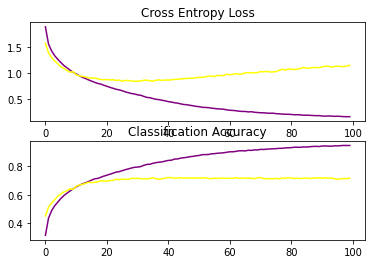

In [ ]:
summarize_diagnostics(history)
#coomo vemos en el resultado, existe overfitting a partir de la epoca 70
#70

In [ ]:
#guardamos el modelo en el formato Keras HDF5
#para más info sobre este formato usado en Keras, ver aquí: https://www.tensorflow.org/guide/keras/save_and_serialize?hl=es-419
#esta extensión h5 nos ayuda a después cargar el mismo modelo que entrenamos
#directamente desde este archivo
model.save('modelo_final.h5')

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array
from keras.models import load_model

In [ ]:
#usamos el modelo guardado para predecir 3 imagnes
def load_image(filename):
 # cargamos la imagen y ajustamos o reajsutamos el tamaño (todos iguales pixeles 32x32)
 img = load_img(filename, target_size=(32, 32))
 #convertimos TODA LA DATA (pixeles) de LA IMAGEN a un array
 img = img_to_array(img)


 #damos forma A ESTE ARRAY (PIXELES) DE LA IMAGEN y lo convertimos a una muestra con 3 canales, de la 
 #siguiente manera: 
 #aqui le decimos al sistema que nos devuelva un ARRAY de 4 DIMENSIONES (1,32,32,3), EXISTEN 4 VALORES QUE
 #LE DAMOS
 #Ese 4D ARRAY tendrá 1 array que contendrá 32 arrays (osea todos los pixeles de las filas), 
 #a su vez éste contendrá 32 arrays (cada pixel de cada columna de las filas) y
 #los cuales tendrán 3 elementos cada uno, ESTOS 3 ELEMENTOS son los 3 canales (R,G,B) que
 #vendría a ser el valor de cada pixel


 img = img.reshape(1, 32, 32, 3)

 #mas info para "reshape": https://www.w3schools.com/python/numpy/numpy_array_reshape.asp

 #convertimos pixeles a valores entre 0 y 1
 img = img.astype('float32')
 img = img / 255.0
 return img

In [ ]:
import numpy as np

In [ ]:
def _predict(image_name):
 #cargamos la imagen
 img = load_image(image_name)
 #cargamos neustro modelo
 model = load_model('modelo_final.h5')
 # predecimos
 result = model.predict(img)
 classes_x = np.argmax(result,axis=1)

 print(classes_x)
 
#empezamos a predecir
_predict('barco.png') #8 es barco-imagenes de CFAR
_predict('gato.png') #3 es gato-imagenes de CFAR
_predict('carro.png') #automovil es 3 -imagenes de CFAR
_predict('barco2.png') #8 es barco -> IMAGEN RESCATADA DE: https://computerhoy.com/noticias/life/boka-vanguard-barco-transporta-transatlanticos-564657
_predict('gato2.png') #3 es gato -> imagen rescatada de: https://unsplash.com/es/fotos/Y0WXj3xqJz0



1/1 [==============================] - 0s 70ms/step
[8]
1/1 [==============================] - 0s 72ms/step
[3]
1/1 [==============================] - 0s 108ms/step
[1]
1/1 [==============================] - 0s 107ms/step
[8]
1/1 [==============================] - 0s 99ms/step
[3]


##CFAR DATASET fue recolectado de: http://www.cs.toronto.edu/~kriz/cifar.html